<a href="https://colab.research.google.com/github/FelipeOLCunha/Web-Scraping-in-Python/blob/main/%5BPROJECT%5D_Web_Scraping_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

page = requests.get('https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue')
soup = BeautifulSoup(page.text, 'html')
#print(soup)


In [6]:
#soup.find('table')

In [7]:
table = soup.find('table',class_ = 'wikitable sortable')
#print(table)

In [8]:
headers = table.find_all('th')
headers

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [ ]:
clean_headers = [title.text.strip() for title in headers]
print(clean_headers)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [ ]:
df = pd.DataFrame(columns = clean_headers)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [ ]:
column_data = table.find_all('tr')

for row in column_data[1:]:
  row_data = row.find_all('td')
  #print (row_data)
  clean_row_data = [data.text.strip() for data in row_data]
  #print (clean_row_data)

  lenght = len(df) # creating the number of necessary rows in the dataframe df
  df.loc[lenght] = clean_row_data


In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [ ]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Companies.csv', index = False)

# Data Cleaning


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Companies.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [ ]:
df['Rank'] = df['Rank'].astype(int)

df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(int)
#df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(int)

df['Revenue growth'] = df['Revenue growth'].str.rstrip('%').astype(float)
#df['Revenue growth'] = df['Revenue growth'].astype(float)

df['Employees'] = df['Employees'].str.replace(',','').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int64  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int64  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [ ]:
df = df.set_index('Rank')
df

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"
...,...,...,...,...,...,...
96,Best Buy,Retail,46298,10.6,71100,"Richfield, Minnesota"
97,Bristol-Myers Squibb,Pharmaceutical industry,46159,0.5,34300,"New York City, New York"
98,United Airlines,Airline,44955,82.5,92795,"Chicago, Illinois"


# Data Analysis

In [ ]:
df.describe()

,Revenue (USD millions),Revenue growth,Employees
count,100.000000,100.000000,1.000000e+02
mean,117566.460000,19.576000,1.680301e+05
std,100915.112163,21.463397,2.717493e+05
min,44200.000000,0.500000,3.050000e+02
25%,57876.000000,4.375000,4.471150e+04
50%,80824.500000,11.700000,8.963850e+04
75%,138763.000000,23.625000,1.965125e+05
max,611289.000000,97.200000,2.100000e+06


<ipython-input-116-c3eaac6002ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


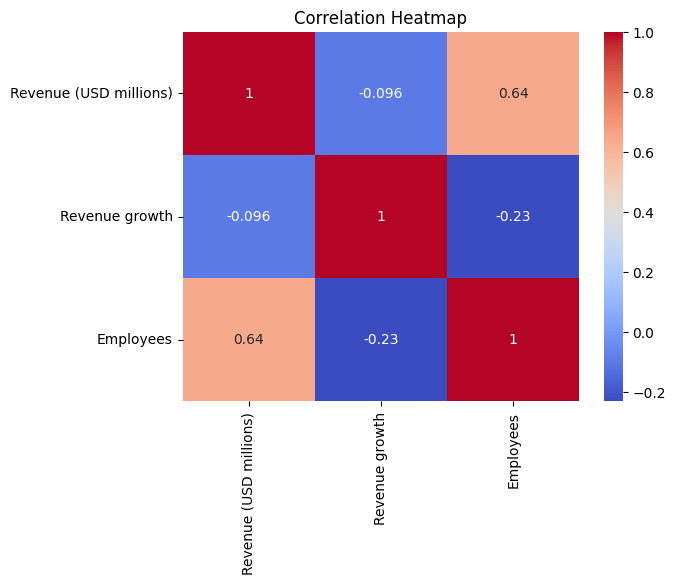

In [ ]:
correlation_matrix = df.corr()
correlation_matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

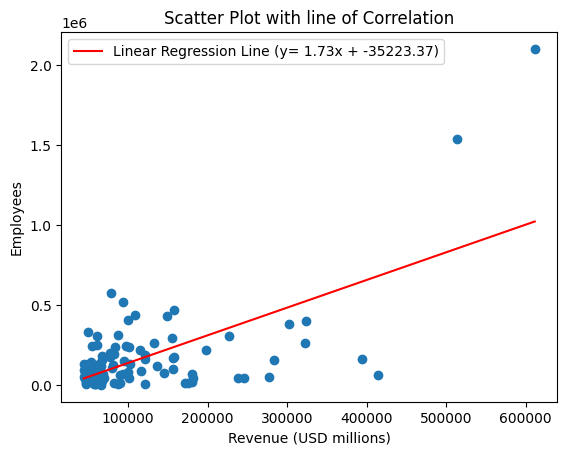

In [ ]:
plt.scatter(df['Revenue (USD millions)'],df['Employees'])
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Employees')
plt.title('Scatter Plot with line of Correlation')

coefficients = np.polyfit(df['Revenue (USD millions)'],df['Employees'],1)
slope, intercept = coefficients
x = np.array(df['Revenue (USD millions)'])
line = slope * x + intercept
plt.plot(x, line, color='red', label = f'Linear Regression Line (y= {slope:.2f}x + {intercept: .2f})')

plt.legend()
plt.show()


Text(0.5, 1.0, 'Total Revenue of the top 5 Companies')

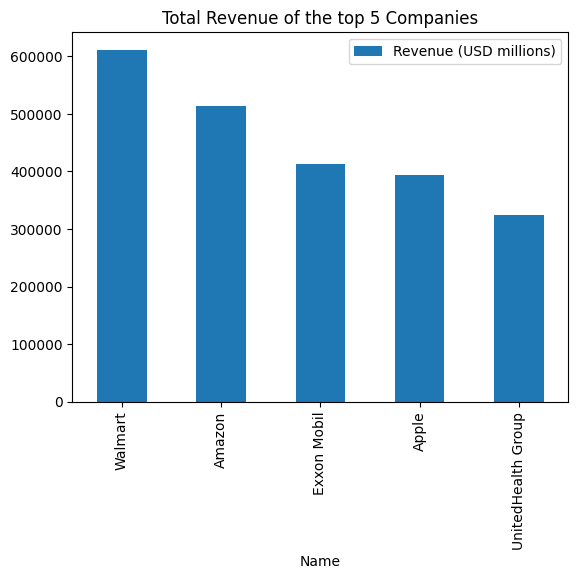

In [ ]:
top5_revenue=df.head().plot(x='Name',y='Revenue (USD millions)', kind='bar')
top5_revenue.set_title("Total Revenue of the top 5 Companies")

Text(0.5, 1.0, 'Revenue growth of the top 5 companies ')

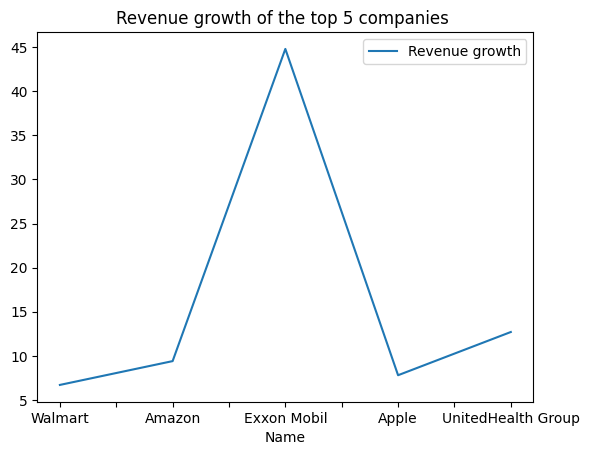

In [ ]:
top5_revenue_growth=df.head().plot(x='Name',y='Revenue growth')
top5_revenue_growth.set_title("Revenue growth of the top 5 companies ")

In [ ]:
exxon_mobil_name = df.loc[3]
print(exxon_mobil_name)

Name                             Exxon Mobil
Industry                  Petroleum industry
Revenue (USD millions)                413680
Revenue growth                          44.8
Employees                              62000
Headquarters                   Spring, Texas
Name: 3, dtype: object


In [ ]:
top4 = df.iloc[[0,1,3,4]]
top4

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [ ]:
dftop4 = top4.mean()
dftop4.loc['Name'] = 'Top4'
dftop4

<ipython-input-144-f12dbab3a9c3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dftop4 = top4.mean()


Revenue (USD millions)     460940.5
Revenue growth                 9.15
Employees                 1051000.0
Name                           Top4
dtype: object

In [ ]:
new_df = pd.DataFrame ([dftop4, exxon_mobil_name])
new_df

,Revenue (USD millions),Revenue growth,Employees,Name,Industry,Headquarters
Unnamed 0,460940.5,9.15,1051000.0,Top4,NaN,NaN
3,413680.0,44.80,62000.0,Exxon Mobil,Petroleum industry,"Spring, Texas"


<Axes: xlabel='Name'>

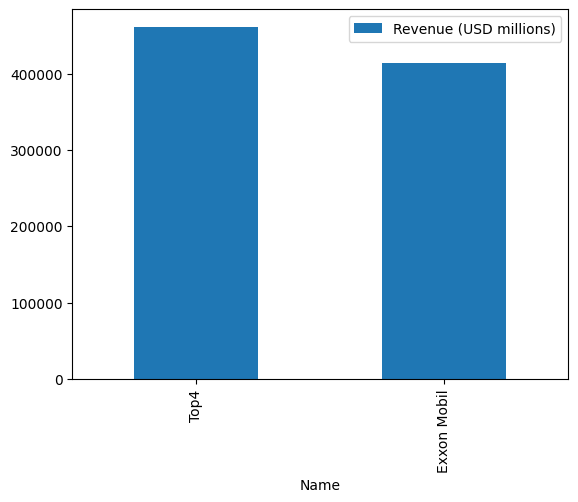

In [ ]:
new_df.plot(x='Name',y='Revenue (USD millions)', kind='bar')

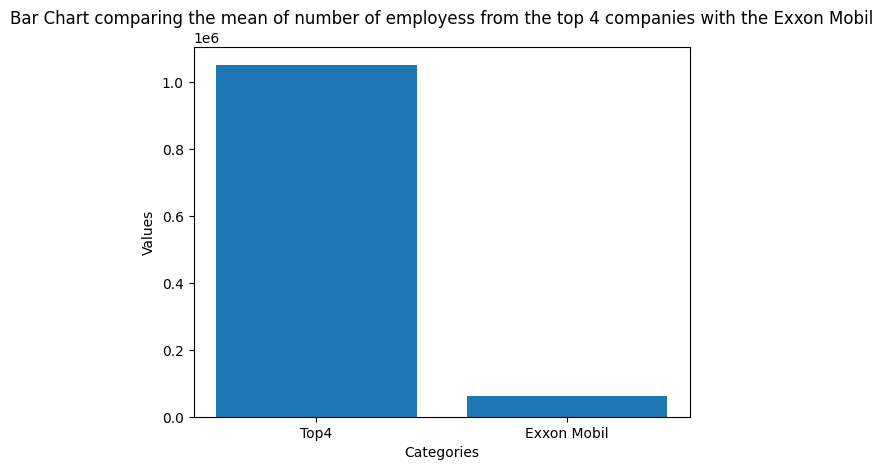

In [ ]:
plt.bar(new_df['Name'],new_df['Employees'])
#plt.yscale('linear')
#plt.yticks(range(0, int(max(new_df['Employees'])) + 1, 5000))
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart comparing the mean of number of employess from the top 4 companies with the Exxon Mobil')
plt.show()


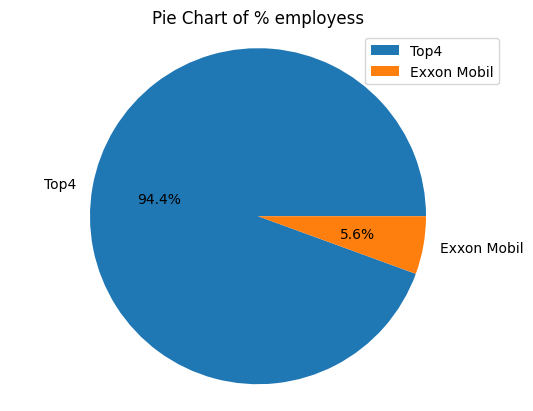

In [ ]:
plt.pie(new_df['Employees'], labels = new_df['Name'], autopct='%1.1f%%')
plt.title ('Pie Chart of % employess')
plt.legend(loc='best')
plt.axis('equal')
plt.show()